In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
iris = load_iris()
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target



In [4]:

print(x.var())

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


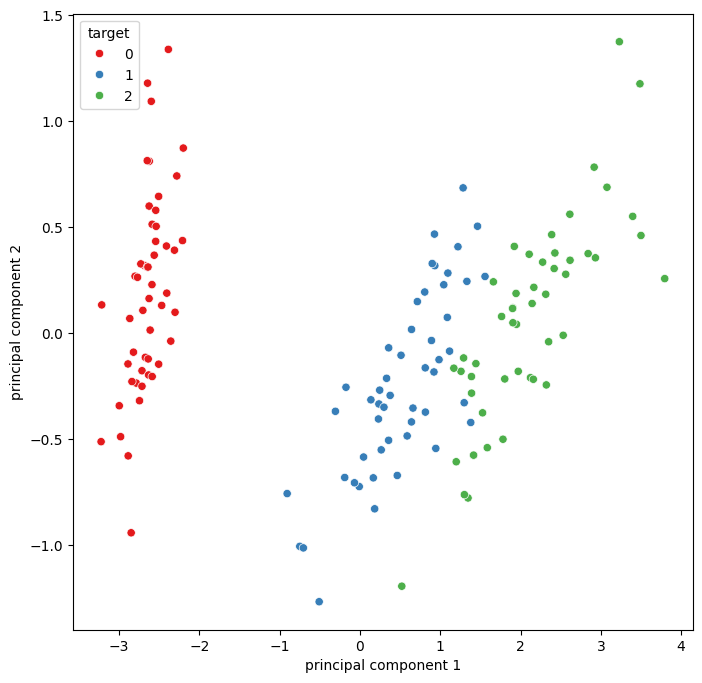

[0.92461872 0.05306648]


In [5]:

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame(y, columns = ['target'])], axis = 1)

plt.figure(figsize = (8,8))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="target", data=finalDf,
    palette="Set1", legend="full")
plt.show()
#print the varance
print(pca.explained_variance_ratio_)


In [6]:
pca.explained_variance_

array([4.22824171, 0.24267075])

[1. 1. 1. 1.]


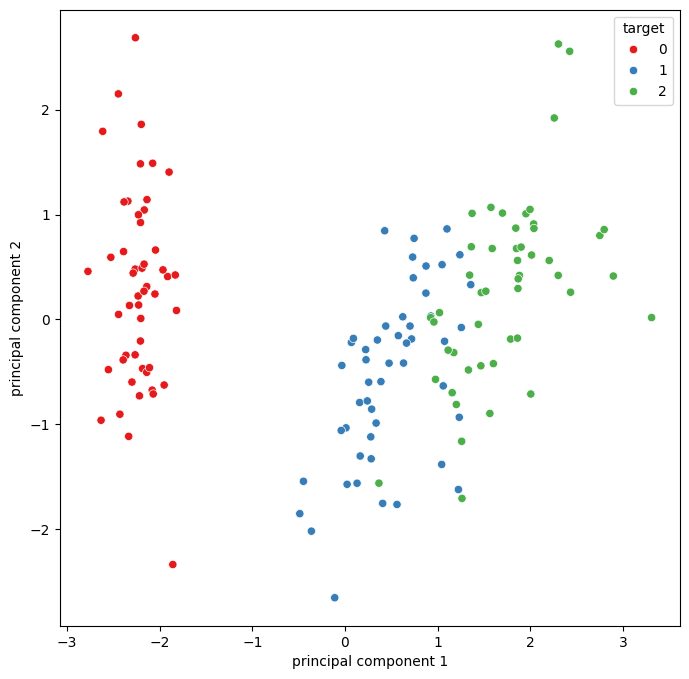

[0.72962445 0.22850762]


array([2.93808505, 0.9201649 ])

In [7]:
x = StandardScaler().fit_transform(x)

#print the variance of the features of the normalized data
print(np.var(x, axis=0))


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame(y, columns = ['target'])], axis = 1)

plt.figure(figsize = (8,8))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="target", data=finalDf,
    palette="Set1", legend="full")
plt.show()

print(pca.explained_variance_ratio_)

pca.explained_variance_

In [8]:
# Logisticregression model

X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



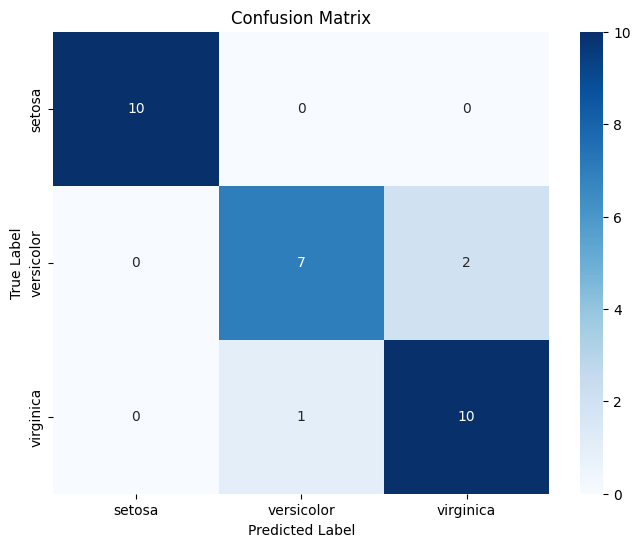

In [9]:

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()